In [1]:
# imports pandas library
import pandas as pd 

# imports numpy library
import numpy as np 

# imports matplotlib library for data viz
import matplotlib.pyplot as plt 

# imports seaborn for data viz
import seaborn as sns

import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [14]:
# Reads the dataset
df = pd.read_csv("ecommerce_data.csv", encoding = "Latin-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [15]:
df.shape

(541909, 9)

In [20]:
#we check which are the coloumns having null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
channel             0
dtype: int64

In [21]:
#we drop the customer  IDs with null values
df= df[pd.notnull(df['CustomerID'])]

In [22]:
#then we again check whether any null values in the data
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
channel        0
dtype: int64

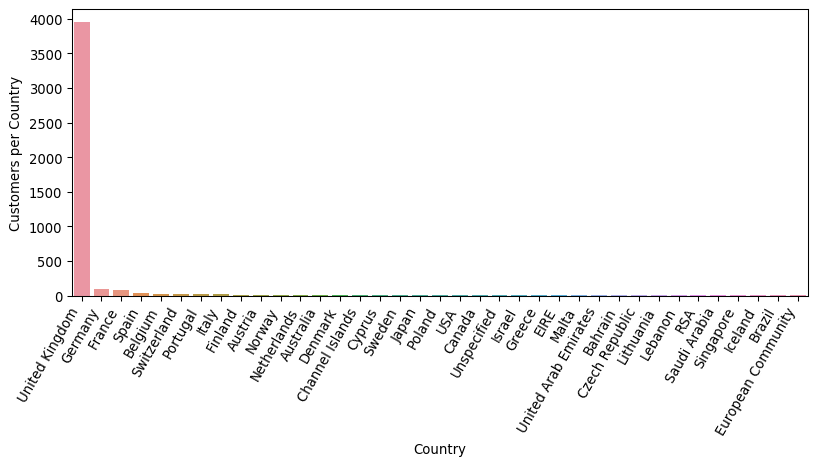

In [23]:
country_cust = pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
country_cust.columns = ['Customers per Country']
country_cust.sort_values('Customers per Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(10,4),dpi=95)
ax=sns.barplot(x=country_cust.index, y=country_cust['Customers per Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

In [24]:
#As most of the customers are in UK so we focus on UK data
uk_df = df[df['Country']=='United Kingdom']
uk_df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
#For Checking the shape of the data set of UK
uk_df.shape

(361878, 9)

In [27]:
#as we see in the table above that minimum values have negative values, that is not possible, it means there can be some returns
#hence we need not include that in our data so we take only those data for which the quantity > 0.
uk_df = uk_df[(uk_df['Quantity']>0)]

In [28]:
#as I take the rfm analysis method for clustering, I pick only those coloumns which are necessary
uk_df=uk_df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [29]:
#i calculate the total money spent by each customer by multiplying the quantity and unit price
uk_df['TotalMoney'] = uk_df['Quantity'] * uk_df['UnitPrice']

In [30]:
#For finding out the first and the last order dates in UK data
uk_df['InvoiceDate'].min()
uk_df['InvoiceDate'].max()

'9/9/2011 9:52'

In [31]:
#For finding out the current recency, we create today
today = datetime.datetime(2011,12,10)
today
uk_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
uk_df.dtypes

CustomerID            float64
InvoiceDate    datetime64[ns]
InvoiceNo              object
Quantity                int64
UnitPrice             float64
TotalMoney            float64
dtype: object

In [32]:
#Creating an RFM Customer Segmentation Table
#here we calculate the recency, frequency and the total money spent data.
#Recency: the number of days between present date and date of last purchase each customer.
#Frequency: the number of orders for each customer.
#Monetary: sum of purchase price for each customer.
rfm= uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalMoney': lambda price: price.sum()})

In [34]:
#RFM metric for each customer
#monetary value=Unit price * quantity = amount
rfm.head()

,InvoiceDate,InvoiceNo,TotalMoney
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [35]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalMoney'], dtype='object')

In [36]:
#then we rename the coloumns accordingly
rfm.columns=['Recency','Frequency','Monetary_value']

In [38]:
#we change the data type for recency to integer as its an integer value
rfm['Recency'] = rfm['Recency'].astype(int)

In [39]:
#Splitting the metrics into segments by creating quantiles, creating 4 groups 4 in this case
# Using quantile-based discretization function to create labels and assigning them to the percentile groups 
#I use qcut data to bin the data into quantiles so that the values can be ranked.
#we need the lowest recency value
#we need highest frrequency value
#we need highest total money spent value
rl = range(4, 0, -1)
rg = pd.qcut(rfm.Recency, q = 4, labels = rl)

fl = range(1, 5)
fg = pd.qcut(rfm.Frequency, q = 4, labels = fl)

ml = range(1, 5)
mg = pd.qcut(rfm.Monetary_value, q = 4, labels = ml)

mg.head()

CustomerID
12346.0    4
12747.0    4
12748.0    4
12749.0    4
12820.0    3
Name: Monetary_value, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [41]:
# make columns for quartiles
rfm['R_Quartile'] = rg.values
rfm['F_Quartile'] = fg.values
rfm['M_Quartile'] = mg.values

In [42]:
# summing up the three quartile columns
rfm['RFM_Segment'] = rfm.apply(lambda a: str(a['R_Quartile']) + str(a['F_Quartile']) + str(a['M_Quartile']), axis = 1)
rfm['RFM_Score'] = rfm[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0
12747.0,2,103,4196.01,4,4,4,444,12.0
12748.0,0,4596,33719.73,4,4,4,444,12.0
12749.0,3,199,4090.88,4,4,4,444,12.0
12820.0,3,59,942.34,4,3,3,433,10.0


In [43]:
# Averae value for each RFM_score
rfm_aggregate = rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary_value' : ['mean', 'count']
})

rfm_aggregate.round(1).head()

Recency Frequency Monetary_value      
             mean      mean           mean count
RFM_Score                                       
3.0         257.9       8.1          152.3   343
4.0         174.0      13.7          234.2   362
5.0         153.0      21.0          357.0   470
6.0          96.5      28.3          827.6   425
7.0          78.1      38.5          733.0   393

In [44]:
#Groups based on the aggregated value of RFM score 
score_l = ['Green', 'Bronze', 'Silver', 'Gold']
score_g = pd.qcut(rfm.RFM_Score, q = 4, labels = score_l)
rfm['RFM_Level'] = score_g.values

rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold
12748.0,0,4596,33719.73,4,4,4,444,12.0,Gold
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold
12820.0,3,59,942.34,4,3,3,433,10.0,Silver


In [45]:
#Picking up the top 10 best customers of UK
rfm[rfm['RFM_Score']==12.0].sort_values('Monetary_value', ascending=False).head(10)
rfm

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold
12748.0,0,4596,33719.73,4,4,4,444,12.0,Gold
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold
12820.0,3,59,942.34,4,3,3,433,10.0,Silver
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111,3.0,Green
18281.0,180,7,80.82,1,1,1,111,3.0,Green
18282.0,7,12,178.05,4,1,1,411,6.0,Bronze


In [46]:
#Finding the segmented customers for particular groups for targeting in UK
print("Total Customers in UK: ",len(rfm))
print("Frequent Regular High Purchase Customers: ",len(rfm[rfm['RFM_Score']==12.0]))
print('Loyal Customers with High Frequency: ',len(rfm[rfm['F_Quartile']==4]))
print("Hefty Spend Customers: ",len(rfm[rfm['M_Quartile']==4]))
print('Churning Customers: ',len(rfm[rfm['RFM_Segment']=='111']))

Total Customers in UK:  3921
Frequent Regular High Purchase Customers:  409
Loyal Customers with High Frequency:  980
Hefty Spend Customers:  980
Churning Customers:  343


In [17]:
#Applying KMeans Clustering for Customer Segmentation

In [47]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x
# apply the function to Recency and MonetaryValue column 
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary_value'] = [neg_to_zero(x) for x in rfm.Monetary_value]
rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold
12748.0,1,4596,33719.73,4,4,4,444,12.0,Gold
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold
12820.0,3,59,942.34,4,3,3,433,10.0,Silver


In [48]:
rfm_log = rfm[['Recency', 'Frequency', 'Monetary_value']].apply(np.log, axis = 1).round(3)

In [49]:
# scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [51]:
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935


In [52]:
rfm_scaled.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935


Text(0.5, 1.0, 'Elbow curve')

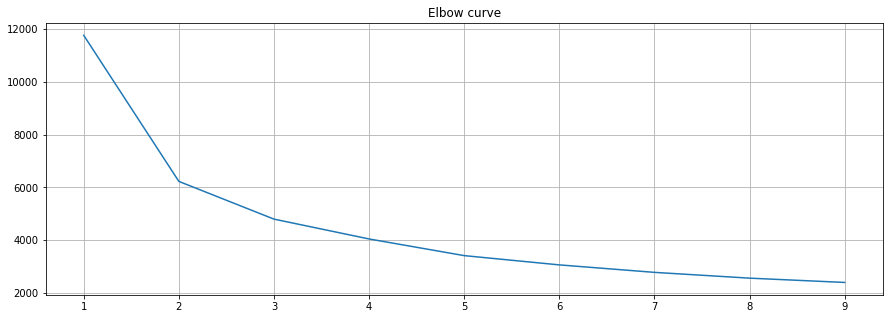

In [53]:
X = rfm_scaled.copy() # copy the normalized_df and save it to a variable named X

distorsions = [] # create an empty list named distorsions

for k in range(1, 10): # we will fit multple k-means (from k = 2 to k = 30)
    kmeans = KMeans(n_clusters=k) # creates a k-means instance
    kmeans.fit(X) # fits k-means
    distorsions.append(kmeans.inertia_) # saves the distorsions

fig = plt.figure(figsize=(15, 5)) # create a figure space with a given figure size

plt.plot(range(1, 10), distorsions) #  # plot the distorsions

plt.grid(True) # inserts grids 

plt.title('Elbow curve') # title the plot

In [54]:
model = KMeans(n_clusters = 3) # appears that 7 is the optimal number of classes

model.fit(rfm_scaled) # fits the model

labels = model.labels_ 

In [56]:
# Assign the clusters to datamart
rfm['K_Cluster'] = model.labels_
rfm.head()
rfm['K_Cluster'].value_counts()

1    1661
2    1416
0     844
Name: K_Cluster, dtype: int64

In [57]:
rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze,1
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold,0
12748.0,1,4596,33719.73,4,4,4,444,12.0,Gold,0
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold,0
12820.0,3,59,942.34,4,3,3,433,10.0,Silver,0


In [58]:
rfm.groupby('K_Cluster').mean()

,Recency,Frequency,Monetary_value,RFM_Score
K_Cluster,,,,
0,10.997630,258.453791,5842.081623,11.240521
1,69.487056,69.436484,1187.538611,8.155930
2,165.939972,14.742938,286.139852,4.478107


In [59]:
rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze,1
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold,0
12748.0,1,4596,33719.73,4,4,4,444,12.0,Gold,0
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold,0
12820.0,3,59,942.34,4,3,3,433,10.0,Silver,0


In [60]:
model = KMeans(n_clusters = 6) # appears that 7 is the optimal number of classes

model.fit(rfm_scaled) # fits the model

labels = model.labels_ 

# Assign the clusters to datamart
rfm['K_Cluster'] = model.labels_
rfm.head()
rfm['K_Cluster'].value_counts()

3    980
5    864
4    717
1    543
0    410
2    407
Name: K_Cluster, dtype: int64

In [61]:
rfm.head()

,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6.0,Bronze,3
12747.0,2,103,4196.01,4,4,4,444,12.0,Gold,2
12748.0,1,4596,33719.73,4,4,4,444,12.0,Gold,2
12749.0,3,199,4090.88,4,4,4,444,12.0,Gold,2
12820.0,3,59,942.34,4,3,3,433,10.0,Silver,0


In [62]:
rfm.groupby('K_Cluster').mean()

,Recency,Frequency,Monetary_value,RFM_Score
K_Cluster,,,,
0,6.036585,90.612195,1339.088537,10.231707
1,186.777164,6.325967,191.832228,3.681400
2,9.378378,396.164619,9945.741597,11.791155
3,59.838776,108.904082,1916.031308,9.289796
4,33.910739,25.861925,421.679526,6.527197
5,195.605324,31.540509,494.478729,5.321759


In [32]:
#VISUALISATION

In [63]:
# assign cluster column 
rfm_scaled['K_Cluster'] = model.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)
rfm_scaled.head()

,CustomerID,Recency,Frequency,Monetary_value,K_Cluster,RFM_Level
0,12346.0,1.389971,-2.733639,3.766415,3,Bronze
1,12747.0,-2.061189,0.726978,1.439009,2,Gold
2,12748.0,-2.530970,3.562667,3.104639,2,Gold
3,12749.0,-1.785964,1.218258,1.419028,2,Gold
4,12820.0,-1.785964,0.311106,0.244935,0,Silver


In [64]:
# melt rfm_scaled dataframe
rfm_melt = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], var_name = 'Metrics', value_name = 'Value')
rfm_melt.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12346.0,Bronze,3,Recency,1.389971
1,12747.0,Gold,2,Recency,-2.061189
2,12748.0,Gold,2,Recency,-2.530970
3,12749.0,Gold,2,Recency,-1.785964
4,12820.0,Silver,0,Recency,-1.785964


In [65]:
rfm_melt.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12346.0,Bronze,3,Recency,1.389971
1,12747.0,Gold,2,Recency,-2.061189
2,12748.0,Gold,2,Recency,-2.530970
3,12749.0,Gold,2,Recency,-1.785964
4,12820.0,Silver,0,Recency,-1.785964


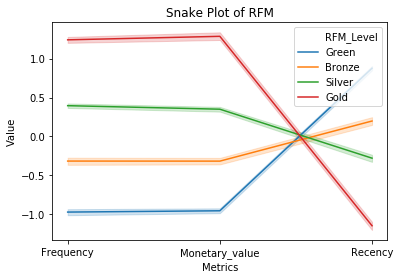

In [66]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melt)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

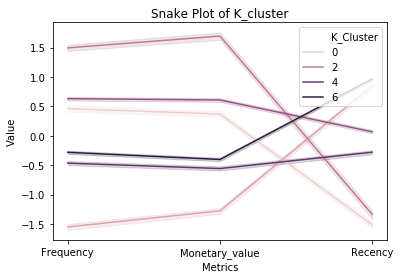

In [67]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melt)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

In [38]:
#HeatMap

In [68]:
# the mean value for each cluster
levelcluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
levelcluster_avg.head()

,Recency,Frequency,Monetary_value
RFM_Level,,,
Green,190.099574,14.947234,259.412137
Bronze,87.636919,33.244499,782.162874
Silver,46.758944,82.039182,1531.314584
Gold,12.893899,282.856764,6055.717162


In [69]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg

Recency             91.729406
Frequency           90.371079
Monetary_value    1863.910368
dtype: float64

In [70]:
prop_rfm = levelcluster_avg/total_avg - 1
prop_rfm

,Recency,Frequency,Monetary_value
RFM_Level,,,
Green,1.072395,-0.834602,-0.860824
Bronze,-0.044615,-0.632133,-0.580365
Silver,-0.490251,-0.092196,-0.178440
Gold,-0.859435,2.129948,2.248932


[]

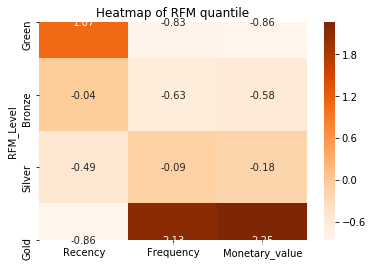

In [42]:
# heatmap
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

In [72]:
# the mean value for each cluster
Kcluster_avg = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]

# the proportional mean value
prop_rfm_K = Kcluster_avg/total_avg - 1
prop_rfm_K

,Recency,Frequency,Monetary_value
K_Cluster,,,
0,-0.934191,0.002668,-0.281570
1,1.036175,-0.930000,-0.897081
2,-0.897760,3.383754,4.335955
3,-0.347660,0.205077,0.027963
4,-0.630318,-0.713825,-0.773766
5,1.132417,-0.650989,-0.734709


[]

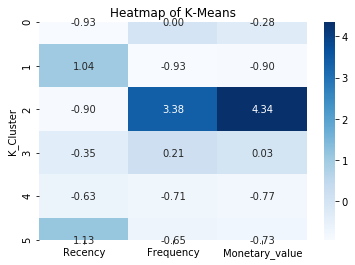

In [73]:
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()

In [ ]:
#Predicting for the next 3 months

In [74]:
# Reads the dataset
data = pd.read_csv("ecommerce_data.csv", encoding = "Latin-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [93]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df[['CustomerID','UnitPrice']]
Y = df['Quantity']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [94]:
#linear model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred_train = model.predict(x_train)

In [103]:
y_pred= model.predict(x_test)

In [104]:
y_pred

array([11.375686  , 11.78099223, 11.79128499, ..., 10.79585779,
       13.22236641, 13.52102589])